# Exploration of traffic data at Hanasaari on road 51

This document explores historical traffic data from an automatic traffic meassurement point on Hanasaari.

"*The TMS point consists of ta data collecting unit and two induction loops on each traffic lane. The device registers vehicles passing the TMS point, recording data such as time, direction, lane, speed, vehicle length, time elapsed between vehicles and the vehicle class.*" From the documentation: http://www.liikennevirasto.fi/web/en/open-data/materials/tms-data#.WeilKBOCwp8

The point is located at: https://www.google.fi/maps/place/60%C2%B009'53.9%22N+24%C2%B050'55.5%22E/@60.1649798,24.846555,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d60.1649771!4d24.8487437?hl=en

Metadata for LAM point (101): https://tie.digitraffic.fi/api/v1/metadata/tms-stations/tms-number/101


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
%matplotlib inline

The first examination will be of all data from 2016.

https://ava.liikennevirasto.fi/lam/rawdata/[year]/[ELY]/lamraw_[lam_id]_[yearshort]_[day_number].csv

NOTE! In the near future the address will change to aineistot.liikennevirasto.fi/

Description of the result file format
The result file is a CSV file separated by semicolons (;). The time is the current time in Finland, EET or EEST in the summertime. The CSV files include the following fields (unit in parentheses):

TMS point id
year
päivän järjestysnumero
hour
minute
second
1/100 second
length (m)
lane
direction
vehicle class
speed(km/h)
faulty (0 = validi record, 1=faulty record)
total time (technical)
time interval (technical)
queue start (technical)

First a test with one day:

In [38]:
columns = [
'TMS id',
'year',
'päivän järjestysnumero',
'hour',
'minute',
'second',
'1/100 second',
'length (m)',
'lane',
'direction',
'vehicle class',
'speed(km/h)',
'faulty (0 = validi record, 1=faulty record)',
'total time (technical)',
'time interval (technical)',
'queue start (technical)']

firstday = pd.read_csv("https://ava.liikennevirasto.fi/lam/rawdata/2016/01/lamraw_101_16_1.csv",sep=';',names=columns)
firstday

,TMS id,year,päivän järjestysnumero,hour,minute,second,1/100 second,length (m),lane,direction,vehicle class,speed(km/h),"faulty (0 = validi record, 1=faulty record)",total time (technical),time interval (technical),queue start (technical)
0,101,16,1,0,0,9,11,3.6,2,1,1,80,0,911,-2,0
1,101,16,1,0,0,17,2,3.8,2,1,1,76,0,1702,774,0
2,101,16,1,0,0,19,99,3.6,5,2,1,82,0,1999,-2,0
3,101,16,1,0,0,21,99,3.4,5,2,1,85,0,2199,184,0
4,101,16,1,0,0,29,99,4.0,2,1,1,95,0,2999,1279,0
5,101,16,1,0,0,40,3,8.0,1,1,1,97,0,4003,-2,0
6,101,16,1,0,0,43,14,3.2,2,1,1,74,0,4314,1299,0
7,101,16,1,0,0,53,4,3.8,5,2,1,81,0,5304,3090,0
8,101,16,1,0,0,54,16,4.0,5,2,1,84,0,5416,95,0
9,101,16,1,0,0,58,99,13.6,6,2,3,67,0,5899,-2,0


In [3]:
firstday['faulty (0 = validi record, 1=faulty record)'].value_counts()

0    26331
1      192
Name: faulty (0 = validi record, 1=faulty record), dtype: int64


#### Drop all rows with faulty records and inspect that there are no non-null values.

In [4]:
valid = firstday['faulty (0 = validi record, 1=faulty record)'] == 0
firstday = firstday[valid]

firstday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26331 entries, 0 to 26522
Data columns (total 16 columns):
TMS id                                         26331 non-null int64
year                                           26331 non-null int64
päivän järjestysnumero                         26331 non-null int64
hour                                           26331 non-null int64
minute                                         26331 non-null int64
second                                         26331 non-null int64
1/100 second                                   26331 non-null int64
length (m)                                     26331 non-null float64
lane                                           26331 non-null int64
direction                                      26331 non-null int64
vehicle class                                  26331 non-null int64
speed(km/h)                                    26331 non-null int64
faulty (0 = validi record, 1=faulty record)    26331 non-null int64
total

### Get data for whole year

In [36]:
types = {
    'päivän järjestysnumero': np.int64,
    'hour': np.int64,
    'minute': np.int64,
    'second': np.int64,
}

usecols = [
    'year',
    'päivän järjestysnumero',
    'hour',
    'minute',
    'second',
    '1/100 second',
    'length (m)',
    'lane',
    'direction',
    'vehicle class',
    'speed(km/h)',
    'faulty (0 = validi record, 1=faulty record)',
    ]

In [35]:
def get_day(year,day):
    
    df = pd.read_csv("https://ava.liikennevirasto.fi/lam/rawdata/{}/01/lamraw_101_{}_{}.csv"
                     .format(str(year),str(year)[-2:], str(day)), sep=';', names=columns, dtype = types,usecols = usecols)
    
    df['päivän järjestysnumero'] = df['päivän järjestysnumero'].apply(lambda x: pd.to_timedelta(x, unit='D'))
    df['hour'] = df['hour'].apply(lambda x: pd.to_timedelta(x, unit='h'))
    df['minute'] = df['minute'].apply(lambda x: pd.to_timedelta(x, unit='m'))
    df['second'] = df['second'].apply(lambda x: pd.to_timedelta(x, unit='s'))
    #convert the centi seconds to a supported prefix format
    df['1/100 second'] = df['1/100 second'].apply(lambda x: pd.to_timedelta(x*10, unit='ms'))
    df = df.rename(columns={'1/100 second': '1/1000 second',})
                    
    return df

In [7]:
def get_year(year):
    
    days = []
    
    for day in range(1,367):
        try:
            df = get_day(year,day)
            valid = df['faulty (0 = validi record, 1=faulty record)'] == 0
            days.append(df[valid])
            
        except urllib.error.HTTPError as e:
            print("Unable to retrive data for day {}".format(day))
    
    return days

In [9]:
days_16 = get_year(2016)

Unable to retrive data for day 54
Unable to retrive data for day 69
Unable to retrive data for day 70
Unable to retrive data for day 366


Apparently there are 3 days missing from the dataset, days: 54, 69 and 70.

Aggregate all days to one dataframe. 

In [10]:
y16 = pd.concat(days_16)
y16

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h),"faulty (0 = validi record, 1=faulty record)"
0,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,00:00:00.110000,3.6,2,1,1,80,0
1,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,00:00:00.020000,3.8,2,1,1,76,0
2,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,00:00:00.990000,3.6,5,2,1,82,0
3,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,00:00:00.990000,3.4,5,2,1,85,0
4,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,00:00:00.990000,4.0,2,1,1,95,0
5,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:40,00:00:00.030000,8.0,1,1,1,97,0
6,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:43,00:00:00.140000,3.2,2,1,1,74,0
7,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:53,00:00:00.040000,3.8,5,2,1,81,0
8,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:54,00:00:00.160000,4.0,5,2,1,84,0
9,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:58,00:00:00.990000,13.6,6,2,3,67,0


In [11]:
y16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21565203 entries, 0 to 57928
Data columns (total 12 columns):
year                                           object
päivän järjestysnumero                         object
hour                                           object
minute                                         object
second                                         object
1/1000 second                                  timedelta64[ns]
length (m)                                     float64
lane                                           object
direction                                      object
vehicle class                                  object
speed(km/h)                                    object
faulty (0 = validi record, 1=faulty record)    object
dtypes: float64(1), object(10), timedelta64[ns](1)
memory usage: 2.1+ GB


Now some of the unnecessary data can be droped.

In [12]:
#Free up some memory
del days_16

In [13]:
unnecessary = ['faulty (0 = validi record, 1=faulty record)']
y16 = y16.drop(unnecessary,axis=1)
y16.head()

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h)
0,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,00:00:00.110000,3.6,2,1,1,80
1,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,00:00:00.020000,3.8,2,1,1,76
2,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,00:00:00.990000,3.6,5,2,1,82
3,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,00:00:00.990000,3.4,5,2,1,85
4,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,00:00:00.990000,4.0,2,1,1,95


In [18]:
#Save to file to be able to continue from here if a crash happens, optional
y16.to_csv('data/hanasaari_lam_2016.csv')

In [19]:
df = pd.read_csv('data/hanasaari_lam_2016.csv')

In [20]:
df.head()

,Unnamed: 0,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h)
0,0,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,0 days 00:00:00.110000000,3.6,2,1,1,80
1,1,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,0 days 00:00:00.020000000,3.8,2,1,1,76
2,2,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,0 days 00:00:00.990000000,3.6,5,2,1,82
3,3,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,0 days 00:00:00.990000000,3.4,5,2,1,85
4,4,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,0 days 00:00:00.990000000,4.0,2,1,1,95


In [27]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h)
0,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,0 days 00:00:00.110000000,3.6,2,1,1,80
1,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,0 days 00:00:00.020000000,3.8,2,1,1,76
2,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,0 days 00:00:00.990000000,3.6,5,2,1,82
3,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,0 days 00:00:00.990000000,3.4,5,2,1,85
4,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,0 days 00:00:00.990000000,4.0,2,1,1,95


In [28]:
y16['date-time'] = pd.datetime(2016,1,1)
y16.head()

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h),date-time
0,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,00:00:00.110000,3.6,2,1,1,80,2016-01-01
1,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,00:00:00.020000,3.8,2,1,1,76,2016-01-01
2,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,00:00:00.990000,3.6,5,2,1,82,2016-01-01
3,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,00:00:00.990000,3.4,5,2,1,85,2016-01-01
4,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,00:00:00.990000,4.0,2,1,1,95,2016-01-01


In [31]:
datetime = y16['date-time'] + (y16['päivän järjestysnumero'] - pd.Timedelta('1 days')) + y16['hour'] + y16['minute'] + y16['second'] + y16['1/1000 second']
datetime.head()

0   2016-01-01 00:00:09.110
1   2016-01-01 00:00:17.020
2   2016-01-01 00:00:19.990
3   2016-01-01 00:00:21.990
4   2016-01-01 00:00:29.990
dtype: datetime64[ns]

In [32]:
datetime.tail()

57924   2016-12-30 23:59:46.990
57925   2016-12-30 23:59:49.990
57926   2016-12-30 23:59:52.990
57927   2016-12-30 23:59:53.710
57928   2016-12-30 23:59:56.720
dtype: datetime64[ns]

In [33]:
y16['date-time'] = datetime
y16.head()

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h),date-time
0,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,00:00:00.110000,3.6,2,1,1,80,2016-01-01 00:00:09.110
1,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,00:00:00.020000,3.8,2,1,1,76,2016-01-01 00:00:17.020
2,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,00:00:00.990000,3.6,5,2,1,82,2016-01-01 00:00:19.990
3,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,00:00:00.990000,3.4,5,2,1,85,2016-01-01 00:00:21.990
4,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,00:00:00.990000,4.0,2,1,1,95,2016-01-01 00:00:29.990


After the creation of a new date-time based index the source data for the index can be removed.

In [34]:
y16 = y16.set_index('date-time')
y16.head()

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h)
date-time,,,,,,,,,,,
2016-01-01 00:00:09.110,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:09,00:00:00.110000,3.6,2,1,1,80
2016-01-01 00:00:17.020,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:17,00:00:00.020000,3.8,2,1,1,76
2016-01-01 00:00:19.990,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:19,00:00:00.990000,3.6,5,2,1,82
2016-01-01 00:00:21.990,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:21,00:00:00.990000,3.4,5,2,1,85
2016-01-01 00:00:29.990,16,1 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:29,00:00:00.990000,4.0,2,1,1,95


In [35]:
unnecessary = ['year','päivän järjestysnumero', 'hour','minute','second','1/1000 second','length (m)']
y16 = y16.drop(unnecessary,axis=1)

In [39]:
y16.head()

,lane,direction,vehicle class,speed(km/h)
date-time,,,,
2016-01-01 00:00:09.110,2,1,1,80
2016-01-01 00:00:17.020,2,1,1,76
2016-01-01 00:00:19.990,5,2,1,82
2016-01-01 00:00:21.990,5,2,1,85
2016-01-01 00:00:29.990,2,1,1,95


### The data set is now cleaned for the purposes of this exploration


#### Write out the dataset to a csv

In [40]:
y16.to_csv('data/hanasaari_lam_2016.csv')

In [2]:
dtypes = {
    'lane': np.int64,
    'direction': np.int64,
    'vehicle class': np.int64,
    'speed(km/h)': np.int64
}


df = pd.read_csv('data/hanasaari_lam_2016.csv', index_col = 0, parse_dates=True,infer_datetime_format=True,dtype=dtypes)
df.head()

,lane,direction,vehicle class,speed(km/h)
date-time,,,,
2016-01-01 00:00:09.110,2,1,1,80
2016-01-01 00:00:17.020,2,1,1,76
2016-01-01 00:00:19.990,5,2,1,82
2016-01-01 00:00:21.990,5,2,1,85
2016-01-01 00:00:29.990,2,1,1,95


In [3]:
y16 = df

In [4]:
monthly = y16.drop(['lane', 'direction','vehicle class','speed(km/h)'],axis=1)
monthly['vehicles in total'] = 1
monthly.head()

,vehicles in total
date-time,
2016-01-01 00:00:09.110,1
2016-01-01 00:00:17.020,1
2016-01-01 00:00:19.990,1
2016-01-01 00:00:21.990,1
2016-01-01 00:00:29.990,1


In [5]:
monthly = monthly.groupby(monthly.index.month).count()

In [6]:
monthly.index.rename("Month",inplace=True);
monthly

,vehicles in total
Month,
1,1737493
2,1529273
3,1363612
4,1671337
5,2040345
6,1856507
7,1526792
8,2020018
9,2017758


In [7]:
months = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"Novebler",12:"Deceber"}

In [8]:
monthly = monthly.rename(months)

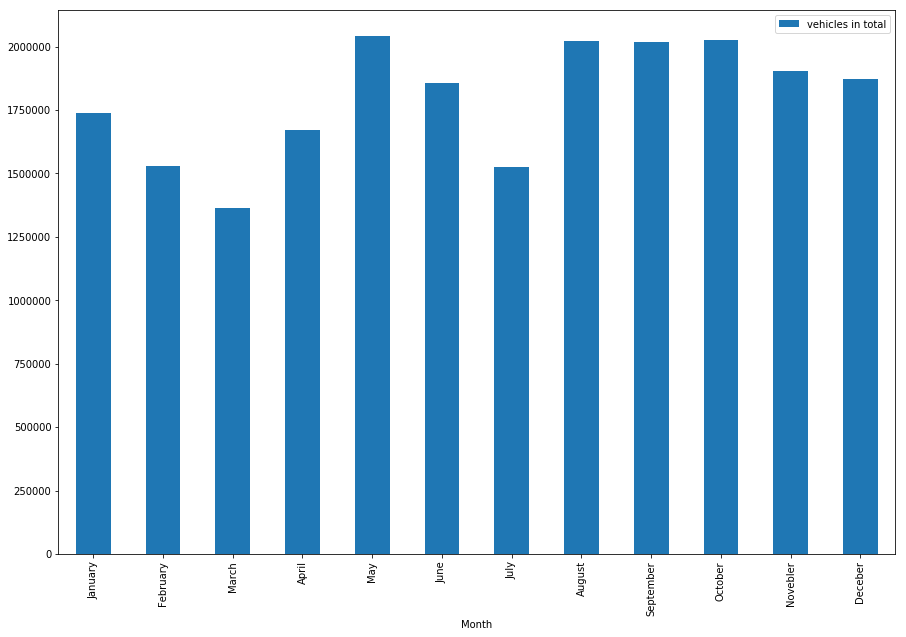

In [9]:
monthly.plot(kind='bar', figsize = (15,10));

Next let's find the month that is closest to the median with respect to total traffic.

In [10]:
monthly["diff"] = monthly["vehicles in total"].apply(lambda x: abs(x - monthly.median()))
monthly

,vehicles in total,diff
Month,,
January,1737493,126713.5
February,1529273,334933.5
March,1363612,500594.5
April,1671337,192869.5
May,2040345,176138.5
June,1856507,7699.5
July,1526792,337414.5
August,2020018,155811.5
September,2017758,153551.5


In [11]:
monthly[monthly["diff"] == monthly["diff"].min()]

,vehicles in total,diff
Month,,
June,1856507,7699.5
Deceber,1871906,7699.5


So it appears that June and December are the median months in respect to total traffic. On the other hand they both contain holidays. Lets look at weeks instead, lets now also consider vehicle classes and average speed.

In [12]:
base = y16.drop(['lane'],axis=1)
print(base.head())
print(base["vehicle class"].unique())

                         direction  vehicle class  speed(km/h)
date-time                                                     
2016-01-01 00:00:09.110          1              1           80
2016-01-01 00:00:17.020          1              1           76
2016-01-01 00:00:19.990          2              1           82
2016-01-01 00:00:21.990          2              1           85
2016-01-01 00:00:29.990          1              1           95
[1 3 2 5 7 4 6]


There are seven vehicle classes:

* cars and delivery vans (1)
* trucks (2)
* buses(3)
* semi-trailer trucks  (4)
* trucks with trailer  (5)
* cars and delivery vans with trailer (6)
* cars and delivery vans with a long trailer or with a mobile home (7)

Lets define light as {1,6,7} heavy as {2,4,5} and buses as {3}

In [13]:
light = {1,6,7}
heavy = {2,4,5}
bus = {3}

In [14]:
base['light traffic'] = base['vehicle class'].apply(lambda x: 1 if x in light else 0)

In [15]:
base['heavy traffic'] = base['vehicle class'].apply(lambda x: 1 if x in heavy else 0)

In [16]:
base['buses'] = base['vehicle class'].apply(lambda x: 1 if x in bus else 0)

In [17]:
base.head()

,direction,vehicle class,speed(km/h),light traffic,heavy traffic,buses
date-time,,,,,,
2016-01-01 00:00:09.110,1,1,80,1,0,0
2016-01-01 00:00:17.020,1,1,76,1,0,0
2016-01-01 00:00:19.990,2,1,82,1,0,0
2016-01-01 00:00:21.990,2,1,85,1,0,0
2016-01-01 00:00:29.990,1,1,95,1,0,0


In [18]:
weekly = base.drop(['vehicle class','direction','speed(km/h)'],axis=1).groupby(base.index.week).sum()
weekly.head()

,light traffic,heavy traffic,buses
date-time,,,
1,345828,12059,11885
2,386195,13621,13393
3,393591,13792,13349
4,406721,13633,14107
5,380599,12894,13129


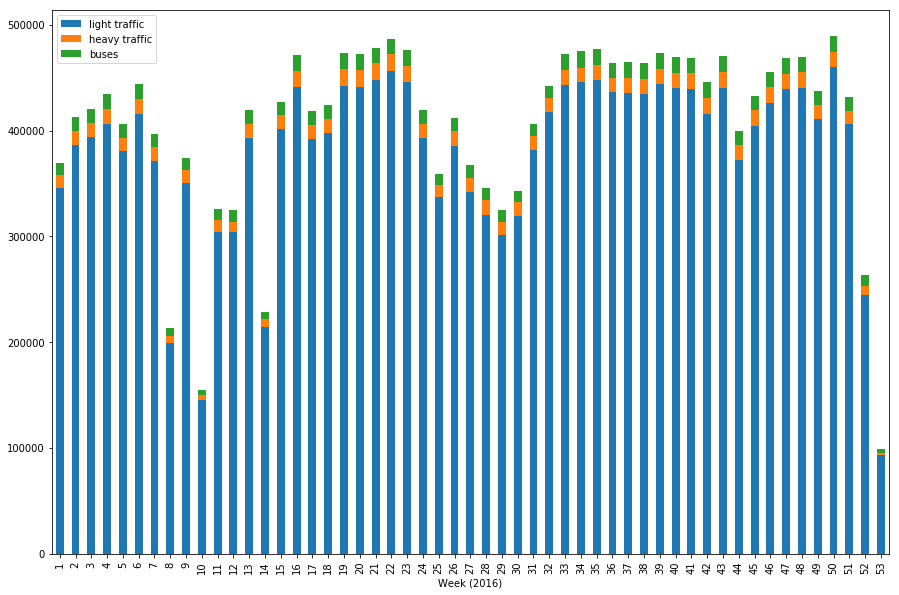

In [19]:
weekly.index.rename("Week (2016)",inplace=True);
weekly.plot(kind='bar', stacked=True, figsize = (15,10));

Apparently there is huge weekly variation in the amount of traffic. What we are interested in is the traffic of a typical working week without any special holidays or occations. The weeks 33-43 seem to reprsesent that well so lets plot distributions in that interval.

In [20]:
weofin = base[(base.index.week >=33) & (base.index.week <=43)]
weofin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5143565 entries, 2016-08-15 00:00:15.990000 to 2016-10-30 23:59:35.990000
Data columns (total 6 columns):
direction        int64
vehicle class    int64
speed(km/h)      int64
light traffic    int64
heavy traffic    int64
buses            int64
dtypes: int64(6)
memory usage: 274.7 MB


In [21]:
weofin_traffic_1 = weofin[weofin['direction'] == 1][['light traffic','heavy traffic','buses']].resample('5T', label='right').sum()
weofin_traffic_2 = weofin[weofin['direction'] == 2][['light traffic','heavy traffic','buses']].resample('5T', label='right').sum()
print(weofin_traffic_2.head())
print(weofin_traffic_1.head())

                     light traffic  heavy traffic  buses
date-time                                               
2016-08-15 00:05:00           13.0            1.0    3.0
2016-08-15 00:10:00           21.0            0.0    1.0
2016-08-15 00:15:00           23.0            0.0    0.0
2016-08-15 00:20:00           16.0            0.0    1.0
2016-08-15 00:25:00           23.0            0.0    0.0
                     light traffic  heavy traffic  buses
date-time                                               
2016-08-15 00:05:00           23.0            1.0    0.0
2016-08-15 00:10:00           35.0            0.0    0.0
2016-08-15 00:15:00           49.0            1.0    0.0
2016-08-15 00:20:00           35.0            0.0    3.0
2016-08-15 00:25:00           23.0            0.0    0.0


In [22]:
weofin_avg_speed_1 = weofin[weofin['direction'] == 1][['speed(km/h)']].resample('5T', label='right').mean()
weofin_avg_speed_2 = weofin[weofin['direction'] == 2][['speed(km/h)']].resample('5T', label='right').mean()
print(weofin_avg_speed_1.head())
print(weofin_avg_speed_2.head())

                     speed(km/h)
date-time                       
2016-08-15 00:05:00    83.375000
2016-08-15 00:10:00    83.657143
2016-08-15 00:15:00    83.260000
2016-08-15 00:20:00    82.421053
2016-08-15 00:25:00    82.913043
                     speed(km/h)
date-time                       
2016-08-15 00:05:00    86.529412
2016-08-15 00:10:00    84.636364
2016-08-15 00:15:00    82.608696
2016-08-15 00:20:00    84.176471
2016-08-15 00:25:00    82.391304


Lets next combine the results to two dataframes, one for the traffic towards helsinki and one the traffic away from helsinki.

In [23]:
weofin_1 = weofin_traffic_1.join(weofin_avg_speed_1, how='inner')
weofin_2 = weofin_traffic_2.join(weofin_avg_speed_2, how='inner')

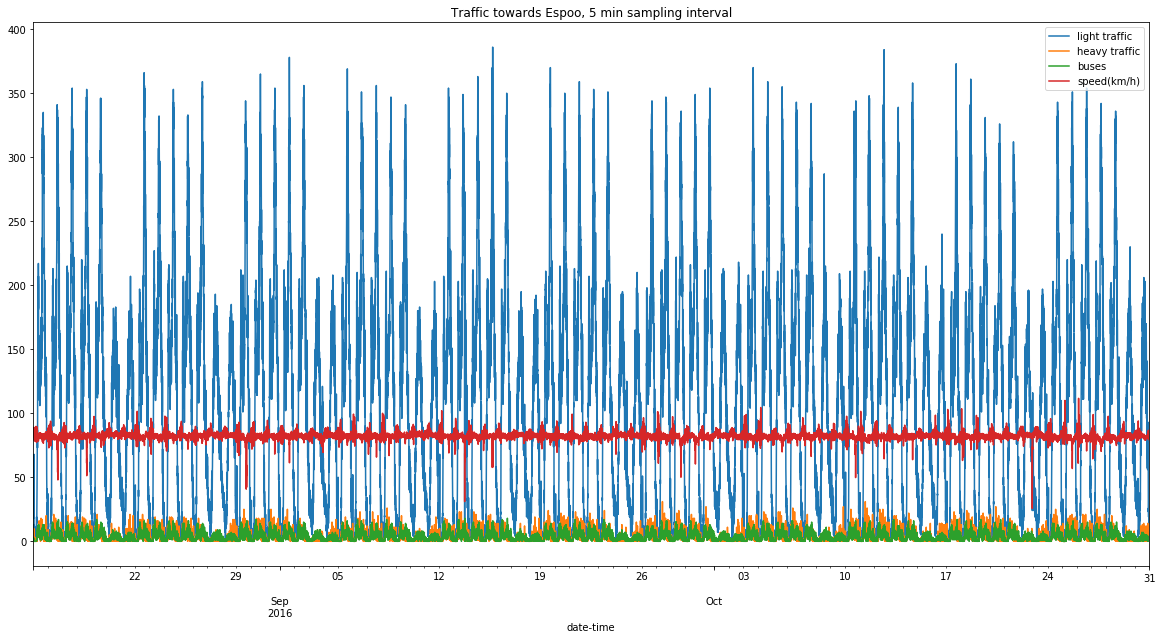

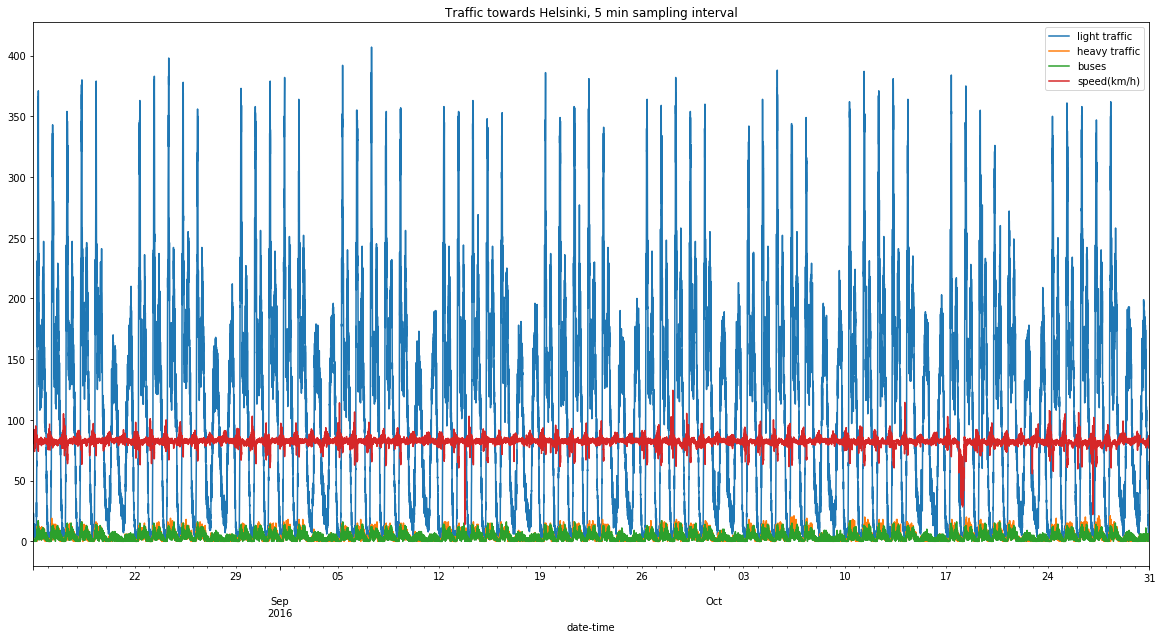

In [24]:
weofin_1.plot( figsize = (20,10),title ='Traffic towards Espoo, 5 min sampling interval');
weofin_2.plot( figsize = (20,10),title ='Traffic towards Helsinki, 5 min sampling interval');

Based on visual inspection the weekly distributions seem to show a small variance. exept for in average speed.

Lets next inspect the distribution of one random week, say 33:

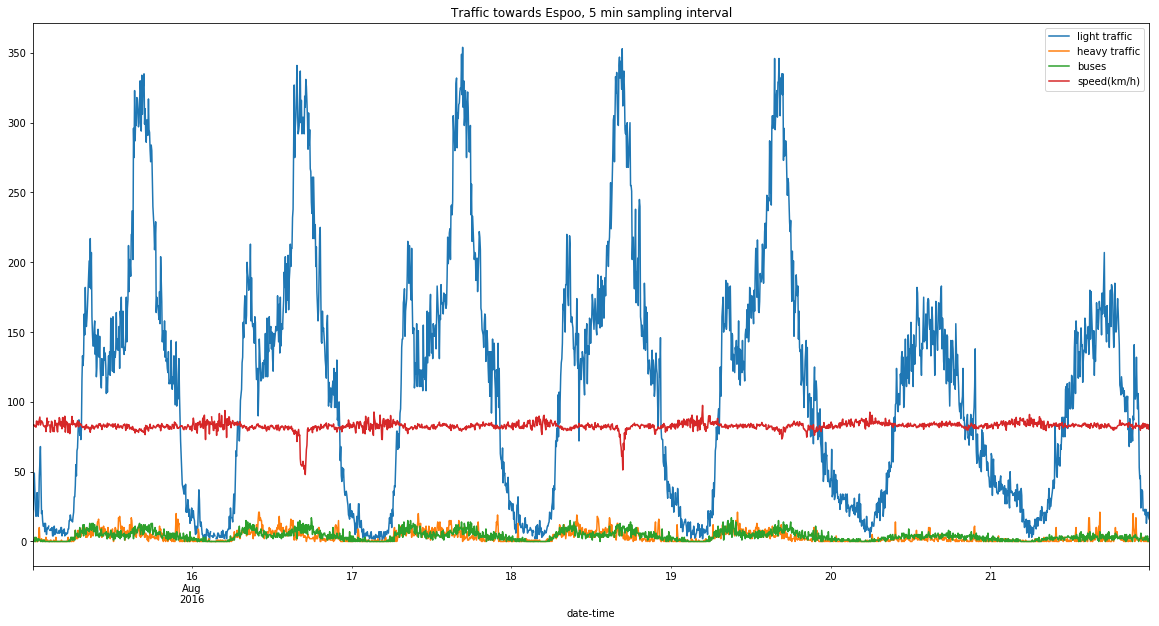

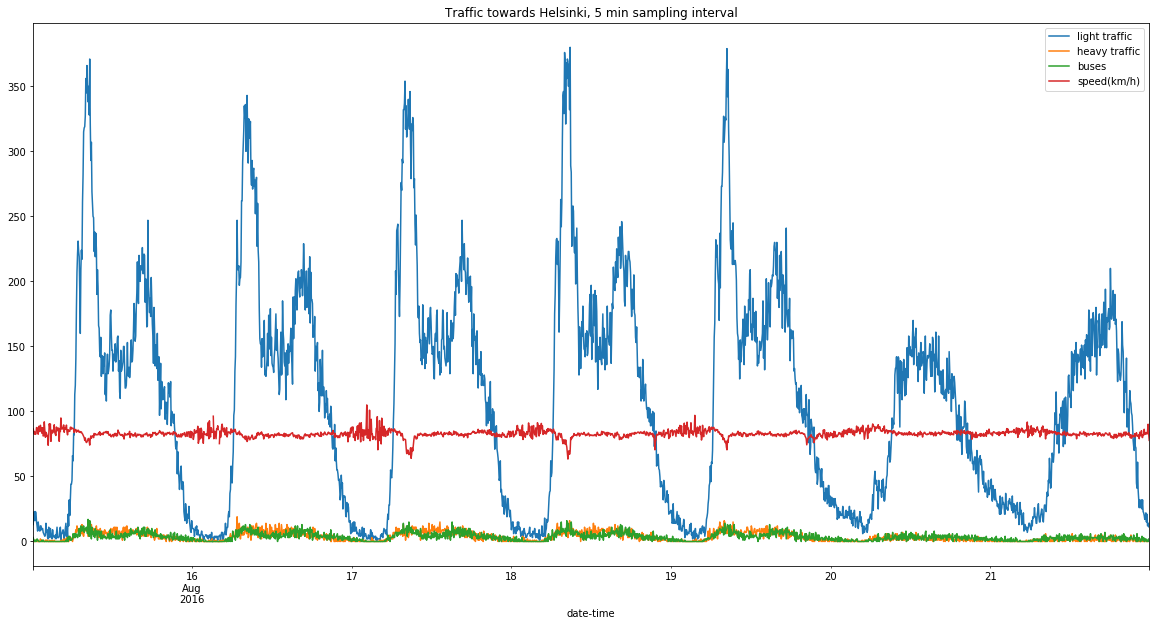

In [25]:
    weofin_1[weofin_1.index.week == 33].plot(figsize = (20,10),title ='Traffic towards Espoo, 5 min sampling interval');
    weofin_2[weofin_2.index.week == 33].plot(figsize = (20,10),title ='Traffic towards Helsinki, 5 min sampling interval');

There seem to be a great resemblance between the days so lets build an average workingdays distribution out of all workindays in the week intervall 33-43.

In [26]:
weofin_1['weekday']= weofin_1.index.weekday
weofin_2['weekday']= weofin_2.index.weekday
weofin_1.head()

,light traffic,heavy traffic,buses,speed(km/h),weekday
date-time,,,,,
2016-08-15 00:05:00,23.0,1.0,0.0,83.375000,0
2016-08-15 00:10:00,35.0,0.0,0.0,83.657143,0
2016-08-15 00:15:00,49.0,1.0,0.0,83.260000,0
2016-08-15 00:20:00,35.0,0.0,3.0,82.421053,0
2016-08-15 00:25:00,23.0,0.0,0.0,82.913043,0


In [27]:
weofin_1['time']= weofin_1.index.time
weofin_2['time']= weofin_2.index.time

In [28]:
weofin_1.head()

,light traffic,heavy traffic,buses,speed(km/h),weekday,time
date-time,,,,,,
2016-08-15 00:05:00,23.0,1.0,0.0,83.375000,0,00:05:00
2016-08-15 00:10:00,35.0,0.0,0.0,83.657143,0,00:10:00
2016-08-15 00:15:00,49.0,1.0,0.0,83.260000,0,00:15:00
2016-08-15 00:20:00,35.0,0.0,3.0,82.421053,0,00:20:00
2016-08-15 00:25:00,23.0,0.0,0.0,82.913043,0,00:25:00


In [29]:
avg_distr_weofin_1 = weofin_1[weofin_1['weekday'] < 5].drop(['weekday'],axis=1).groupby(weofin_1.time).mean()
avg_distr_weofin_2 = weofin_2[weofin_2['weekday'] < 5].drop(['weekday'],axis=1).groupby(weofin_2.time).mean()

In [67]:
avg_distr_weofin_1.index

Index([00:00:00, 00:05:00, 00:10:00, 00:15:00, 00:20:00, 00:25:00, 00:30:00,
       00:35:00, 00:40:00, 00:45:00,
       ...
       23:10:00, 23:15:00, 23:20:00, 23:25:00, 23:30:00, 23:35:00, 23:40:00,
       23:45:00, 23:50:00, 23:55:00],
      dtype='object', name='time', length=288)

In [63]:
xinterval = pd.date_range('1/1/2011', periods=24, freq='H').time.astype(str)

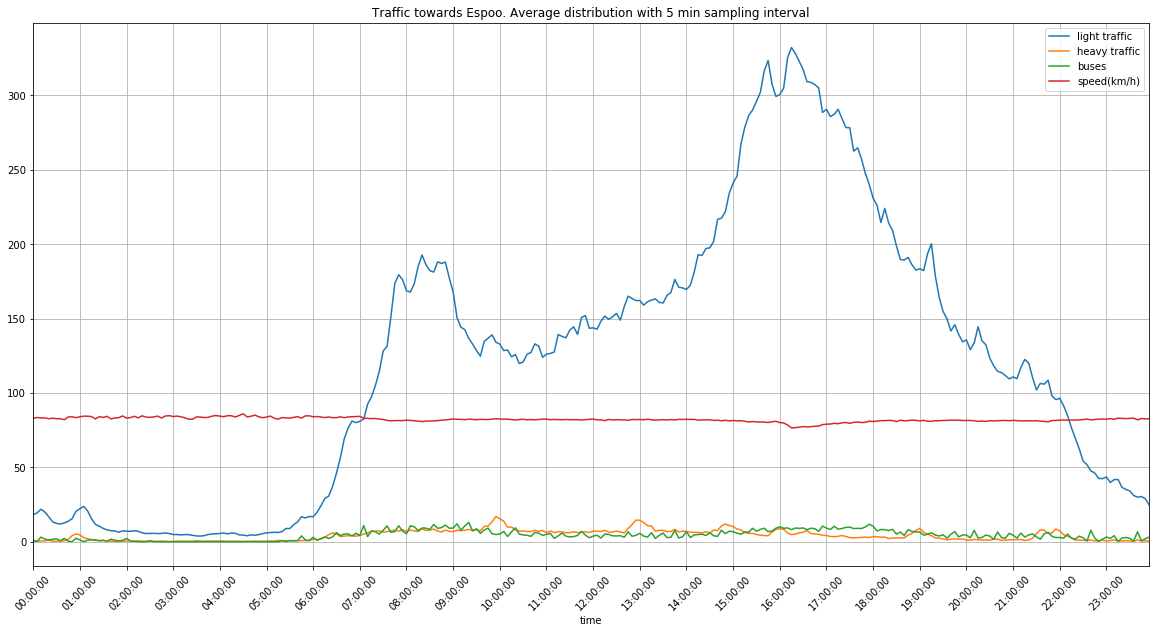

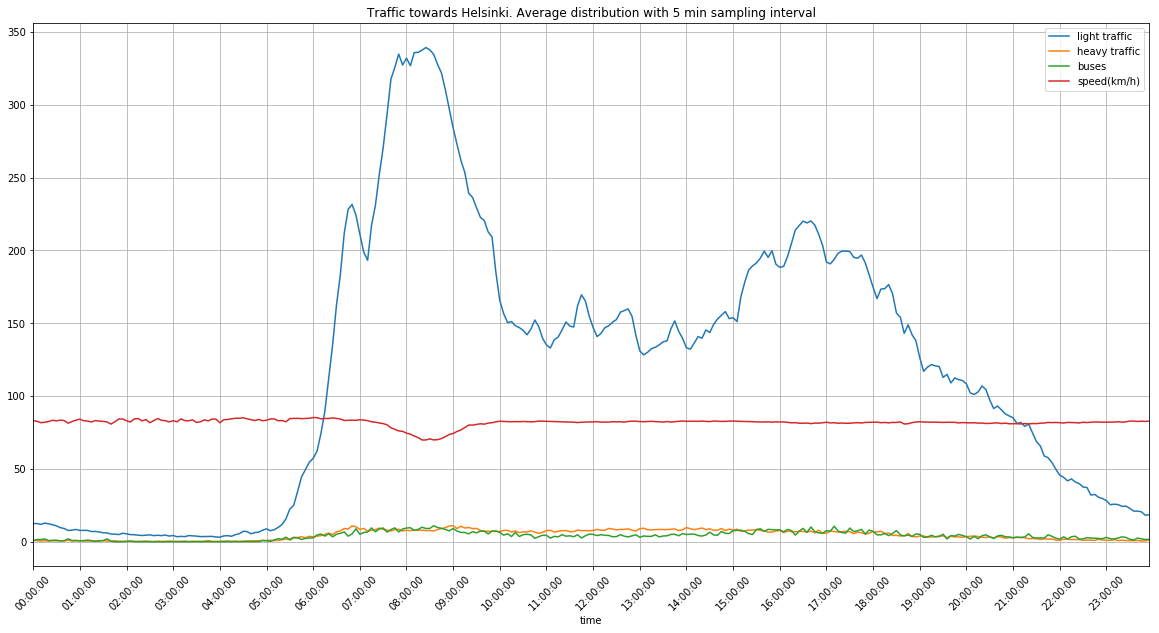

In [64]:
avg_distr_weofin_1.plot(xticks = xinterval,rot=45, figsize = (20,10),grid=True,title ='Traffic towards Espoo. Average distribution with 5 min sampling interval');
avg_distr_weofin_2.plot(xticks = xinterval,rot=45, figsize = (20,10),grid=True,title ='Traffic towards Helsinki. Average distribution with 5 min sampling interval');

## Estimation of junction usage based on empirical observations

Some manual measurements were also done 25.10.2017 :

|      | Amount |	Light traffic | Heavy traffic |
| -----| ---------- | ---------------- | -------------- |
| **Western junction 8.34-8.44** |			| | |
| To Lauttasaari from Espoo |	74 |	73 |	1|
| From Lauttasaari to Espoo  |	43 |	41 |	2 |
| **Eastern junction  8.57-9.07** |		| |	|
| To Lauttasaari from Espoo |	104|	103|	1|
| From Helsinki to Lauttasaari |	13 |	13 |	0|
| From Lauttasaari to Espoo |	72 |	72 |	0|
| From Lauttasaari to Helsinki |	8|	8|	0|

Lets next get the actual data for that day.

In [32]:
pd.to_datetime('25.10.2017')

Timestamp('2017-10-25 00:00:00')

In [33]:
pd.to_datetime('25.10.2017') - pd.to_datetime('1.1.2017')

Timedelta('297 days 00:00:00')

In [39]:
# The differance is 297 days so the 25th is the 298th day
sample_day = get_day(2017,298)

In [40]:
sample_day.head()

,year,päivän järjestysnumero,hour,minute,second,1/1000 second,length (m),lane,direction,vehicle class,speed(km/h),"faulty (0 = validi record, 1=faulty record)"
0,17,298 days,0 days,0 days,00:00:03,00:00:00.990000,3.6,2,1,1,81,0
1,17,298 days,0 days,0 days,00:00:05,00:00:00.990000,3.8,2,1,1,83,0
2,17,298 days,0 days,0 days,00:00:14,00:00:00.990000,3.8,2,1,1,87,0
3,17,298 days,0 days,0 days,00:00:25,00:00:00.990000,3.6,2,1,1,86,0
4,17,298 days,0 days,0 days,00:00:26,00:00:00.990000,4.0,1,1,1,90,0


In [41]:
valid = sample_day['faulty (0 = validi record, 1=faulty record)'] == 0
valid.value_counts()

True     77010
False      747
Name: faulty (0 = validi record, 1=faulty record), dtype: int64

In [42]:
sample_day[valid].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77010 entries, 0 to 77756
Data columns (total 12 columns):
year                                           77010 non-null int64
päivän järjestysnumero                         77010 non-null timedelta64[ns]
hour                                           77010 non-null timedelta64[ns]
minute                                         77010 non-null timedelta64[ns]
second                                         77010 non-null timedelta64[ns]
1/1000 second                                  77010 non-null timedelta64[ns]
length (m)                                     77010 non-null float64
lane                                           77010 non-null int64
direction                                      77010 non-null int64
vehicle class                                  77010 non-null int64
speed(km/h)                                    77010 non-null int64
faulty (0 = validi record, 1=faulty record)    77010 non-null int64
dtypes: float64(1), int

In [43]:
sample_day = sample_day[valid]
sample_day = sample_day.drop(['faulty (0 = validi record, 1=faulty record)'],axis=1)

In [45]:
unnecessary = ['year','päivän järjestysnumero', 'hour','minute','second','1/1000 second','length (m)']
sample_day['date-time'] = pd.datetime(2017,1,1)
sample_day['date-time'] = sample_day['date-time'] + (sample_day['päivän järjestysnumero'] - pd.Timedelta('1 days')) + sample_day['hour'] + sample_day['minute'] + sample_day['second'] + sample_day['1/1000 second']
sample_day = sample_day.drop(unnecessary,axis=1)

In [46]:
sample_day = sample_day.set_index('date-time')
sample_day.head()

,lane,direction,vehicle class,speed(km/h)
date-time,,,,
2017-10-25 00:00:03.990,2,1,1,81
2017-10-25 00:00:05.990,2,1,1,83
2017-10-25 00:00:14.990,2,1,1,87
2017-10-25 00:00:25.990,2,1,1,86
2017-10-25 00:00:26.990,1,1,1,90


In [47]:
sample_day['heavy traffic'] = sample_day['vehicle class'].apply(lambda x: 1 if x in heavy else 0)
sample_day['light traffic'] = sample_day['vehicle class'].apply(lambda x: 1 if x in light else 0)
sample_day = sample_day.drop(['vehicle class'], axis = 1)
sample_day.head()

,lane,direction,speed(km/h),heavy traffic,light traffic
date-time,,,,,
2017-10-25 00:00:03.990,2,1,81,0,1
2017-10-25 00:00:05.990,2,1,83,0,1
2017-10-25 00:00:14.990,2,1,87,0,1
2017-10-25 00:00:25.990,2,1,86,0,1
2017-10-25 00:00:26.990,1,1,90,0,1


In [48]:
interval_1 = sample_day[(sample_day.index <= pd.to_datetime('2017-10-25 08:44:00.000')) & (sample_day.index >= pd.to_datetime('2017-10-25 08:34:00.000'))]
interval_1

,lane,direction,speed(km/h),heavy traffic,light traffic
date-time,,,,,
2017-10-25 08:34:00.010,4,2,77,0,1
2017-10-25 08:34:00.040,5,2,68,0,1
2017-10-25 08:34:00.090,2,1,70,0,1
2017-10-25 08:34:00.050,6,2,67,0,1
2017-10-25 08:34:01.990,2,1,72,0,1
2017-10-25 08:34:01.990,6,2,68,0,1
2017-10-25 08:34:02.060,3,1,83,0,1
2017-10-25 08:34:02.990,4,2,75,0,1
2017-10-25 08:34:03.110,4,2,86,0,1


In [49]:
interval_2 = sample_day[(sample_day.index <= pd.to_datetime('2017-10-25 09:07:00.000')) & (sample_day.index >= pd.to_datetime('2017-10-25 08:57:00.000'))]
interval_2

,lane,direction,speed(km/h),heavy traffic,light traffic
date-time,,,,,
2017-10-25 08:57:00.670,3,1,90,0,1
2017-10-25 08:57:00.500,5,2,62,0,1
2017-10-25 08:57:00.990,4,2,80,0,1
2017-10-25 08:57:01.990,6,2,85,0,1
2017-10-25 08:57:01.990,5,2,60,0,1
2017-10-25 08:57:01.990,4,2,81,0,1
2017-10-25 08:57:01.990,2,1,80,0,1
2017-10-25 08:57:02.200,5,2,61,0,1
2017-10-25 08:57:03.990,2,1,76,0,1


In [57]:
#8.34-8.44
#Towards Helsinki
i1_tohel = interval_1[interval_1['direction'] == 2].sum()
print("Light traffic towards Helsinki (8.34-8.44): ")
print(i1_tohel['light traffic'])
print("Heavy traffic towards Helsinki (8.34-8.44): ")
print(i1_tohel['heavy traffic'])

Light traffic towards Helsinki (8.34-8.44): 
661
Heavy traffic towards Helsinki (8.34-8.44): 
17


In [61]:
#Western junction 8.34-8.44
#Towards Espoo
i1_toesp = interval_1[interval_1['direction'] == 1].sum()
print('Light traffic towards Espoo (8.34-8.44):')
print((i1_toesp['light traffic']))
print('Heavy traffic towards Espoo (8.34-8.44):')
print((i1_toesp['heavy traffic']))

Light traffic towards Espoo (8.34-8.44):
402
Heavy traffic towards Espoo (8.34-8.44):
16


In [62]:
#8.57-9.07
i2_tohel = interval_2[interval_2['direction'] == 2].sum()
i2_toesp = interval_2[interval_2['direction'] == 1].sum()
print('Light traffic towards Espoo (8.57-9.07):')
print((i2_toesp['light traffic']))
print('Heavy traffic towards Espoo (8.57-9.07):')
print((i2_toesp['heavy traffic']))
print('Light traffic towards Helsinki (8.57-9.07):')
print((i2_tohel['light traffic']))
print('Heavy traffic towards Helskinki (8.57-9.07):')
print((i2_tohel['heavy traffic']))

Light traffic towards Espoo (8.57-9.07):
352
Heavy traffic towards Espoo (8.57-9.07):
14
Light traffic towards Helsinki (8.57-9.07):
540
Heavy traffic towards Helskinki (8.57-9.07):
17


With the help of the observations made at the junctions and information about the total traffic in both directions probabilities/proportions for which junctions are taken can be calculated. Some proportions are exact in the interval measured and others have to be approximated based on the two time intervals. From those figures extrapolations about traffic behaviour can be made for any 5 min interval in the average distrubution calculated. This calculation is made in a different .tex document.

### Write out the ditribution

In [169]:
avg_distr_weofin_1.to_csv('data/dist_to_espoo.csv')
avg_distr_weofin_2.to_csv('data/dist_to_helsinki.csv')